# Interpolate between-spots

In [2]:
import os
path = '/home/lingyu/ssd/Python/'
os.chdir(f'{path}STFoundation/Data')

In [3]:
import pandas as pd
leida = pd.read_excel('LeidaFig.xlsx')

In [4]:
leida

,Gene,CNet-Cox,Multivariate Cox
0,EGR1,0.039392,0.197
1,IGFBP5,-0.045433,0.120
2,JUN,0.049436,-0.130
3,MAFK,-0.042469,0.155
4,MYC,0.052026,-0.099
5,TCF7,0.044409,-0.109


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


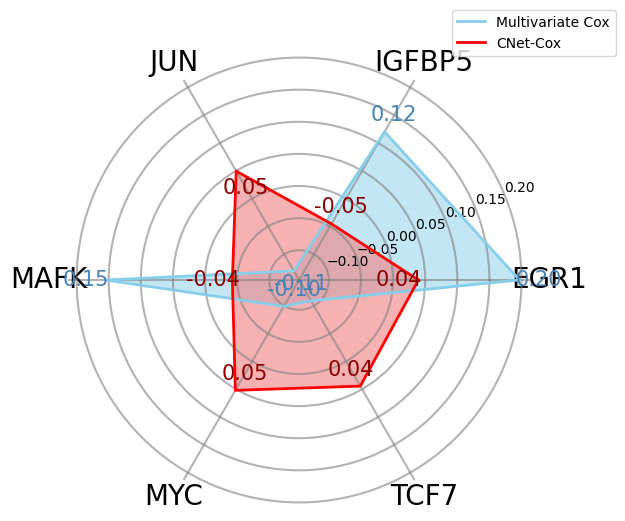

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

leida = pd.DataFrame({
    'Gene': ['EGR1', 'IGFBP5', 'JUN', 'MAFK', 'MYC', 'TCF7'],
    'CNet-Cox': [0.039392, -0.045433, 0.049436, -0.042469, 0.052026, 0.044409],
    'Multivariate Cox': [0.197, 0.120, -0.130, 0.155, -0.099, -0.109]
})

labels = leida['Gene'].tolist()
stats_cnet = leida['CNet-Cox'].tolist()
stats_multi = leida['Multivariate Cox'].tolist()

# Close the data curve: fill in the first point to the end
stats_cnet += stats_cnet[:1]
stats_multi += stats_multi[:1]

# Calculate the angle: one more point is needed for closing
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

ax.plot(angles, stats_multi, color='skyblue', linewidth=2, label='Multivariate Cox')
ax.fill(angles, stats_multi, color='skyblue', alpha=0.5)

# CNet-Cox (inner circle, red)
ax.plot(angles, stats_cnet, color='red', linewidth=2, label='CNet-Cox')
ax.fill(angles, stats_cnet, color='lightcoral', alpha=0.6)


# Add coefficient value labels
for i in range(len(labels)):
    # Multivariate Cox
    ax.text(angles[i],
            stats_multi[i] + 0.03*np.sign(stats_multi[i]),  
            f"{stats_multi[i]:.2f}",
            color='steelblue',
            fontsize=15,
            # fontweight='bold',
            ha='center',
            va='center')
    # CNet-Cox
    ax.text(angles[i],
            stats_cnet[i] - 0.03*np.sign(stats_cnet[i]),  
            f"{stats_cnet[i]:.2f}",
            color='darkred',
            fontsize=15,
            # fontweight='bold',
            ha='center',
            va='center')


ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=20)

ax.spines['polar'].set_visible(False)
ax.grid(color='gray', linestyle='-', linewidth=1.5, alpha=0.6)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))

# plt.savefig(f'{path}STFoundation/Data/LeidaFig.pdf')

plt.show()

## Main steps

Step 1：Filter spots that are not in tissue, only reserve the spots with 1 in `in_tissue` column \
Step 2：Horizontal direction, interpolate new spot between the given spot (x_1, y_1) and its right spot (x_2, y_2) \
Step 3：Vertical direction, for one row and its up-adjacent row, \
    - select two closest spots (x_l, y_l) and (x_r, y_r) in the above row to the given spot (x_o, y_o) in this row, \
    - interpolate one new spot in two adjacent rows.